# Exoplanet Dataset Machine Learning Model 

## INTRODUCTION

### DOMAIN AREA

We are creating a machine learning model that will identify clusters of exoplanets based on common characteristics and inform our view of the universe highlighting commonalities, divergences and distribution within the discovered exoplanets.
It intends also to be a starting point for monitoring the evolution of discoveries and update in real time our evolving comprehension of the universe.

### DATASET

The purpouse of this project is to analyze and describe the Open Exoplanet Dataset available in Kaggle : https://www.kaggle.com/mrisdal/open-exoplanet-catalogue

The dataset contains the characteristics of all discovered exoplanets. Data fields include planet and host star attributes, discovery methods, and date of discovery.

Data was originally collected and continues to be updated by Hanno Rein at the Open Exoplanet Catalogue Github repository. 

The database is licensed under an MIT license. If you use it for a scientific publication, please include a reference to the Open Exoplanet Catalogue: https://github.com/OpenExoplanetCatalogue/open_exoplanet_catalogue on GitHub or to this arXiv paper: http://arxiv.org/abs/1211.7121


### OBJECTIVES

The objective of the project is to use a wide array of techniques and visualization to provide compelling insights into the vast exoplanet dataset. I am interested in exploring statistical data and clustering of planets by characteristics and find insights.


## IMPLEMENTATION

### READ AND CONVERT THE DATASET

In [172]:
# we import pandas library to avail of the dataframe structure and it flexibility and to use it to read the dataset
import pandas as pd
df = pd.read_csv('oec.csv')
df

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.60,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.00,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,eta Cet b,0,2.4600,NaN,407.300000,1.2700,0.170,247.20,NaN,NaN,...,15/12/11,01 08 35.39148,-10 10 56.1570,37.990,1.700,14.300,0.12,4528.0,NaN,Confirmed planets
3580,eta Cet c,0,3.1600,NaN,744.300000,1.9300,0.020,36.67,NaN,NaN,...,15/12/11,01 08 35.39148,-10 10 56.1570,37.990,1.700,14.300,0.12,4528.0,NaN,Confirmed planets
3581,HD 108874 b,0,1.3600,NaN,395.400000,1.0510,0.070,NaN,NaN,NaN,...,10/12/29,12 30 26,+22 52 47,68.500,1.000,1.220,0.14,5407.0,NaN,Confirmed planets
3582,HD 108874 c,0,1.0180,NaN,1605.800000,2.6800,0.250,NaN,NaN,NaN,...,10/12/29,12 30 26,+22 52 47,68.500,1.000,1.220,0.14,5407.0,NaN,Confirmed planets


### PREPROCESS THE DATA

In [173]:
# We can now go ahead to check if there are problematic rows or columns that could affect our analysis
# We want to be safe that our data has the best possible structure for our purpouses.
# We can see for example that in the data we have a lot of NaN data present.
# We want therefore understand better how this missing data is distributed and how it can affect our analysis.

df.isna().sum()


PlanetIdentifier           0
TypeFlag                   0
PlanetaryMassJpt        2271
RadiusJpt                810
PeriodDays                99
SemiMajorAxisAU         2178
Eccentricity            2476
PeriastronDeg           3256
LongitudeDeg            3541
AscendingNodeDeg        3538
InclinationDeg          2919
SurfaceTempK            2843
AgeGyr                  3582
DiscoveryMethod           63
DiscoveryYear             10
LastUpdated                8
RightAscension            10
Declination               10
DistFromSunParsec       1451
HostStarMassSlrMass      168
HostStarRadiusSlrRad     321
HostStarMetallicity     1075
HostStarTempK            129
HostStarAgeGyr          3067
ListsPlanetIsOn            0
dtype: int64

We can see that some colums such as TypeFlag are not missing any data while others such as AgeGyr are almost totally empty.
We will have to decide if this can create bias in our analysis and how to rectify it.
Clearly we can remove the columns with little or no data that do not bring any added value to our model and that will only drain memory and resources.
If we use info() we can see that we are consuming over 700.1+ KB of memory.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PlanetIdentifier      3584 non-null   object 
 1   TypeFlag              3584 non-null   int64  
 2   PlanetaryMassJpt      1313 non-null   float64
 3   RadiusJpt             2774 non-null   float64
 4   PeriodDays            3485 non-null   float64
 5   SemiMajorAxisAU       1406 non-null   float64
 6   Eccentricity          1108 non-null   float64
 7   PeriastronDeg         328 non-null    float64
 8   LongitudeDeg          43 non-null     float64
 9   AscendingNodeDeg      46 non-null     float64
 10  InclinationDeg        665 non-null    float64
 11  SurfaceTempK          741 non-null    float64
 12  AgeGyr                2 non-null      float64
 13  DiscoveryMethod       3521 non-null   object 
 14  DiscoveryYear         3574 non-null   float64
 15  LastUpdated          

In [175]:
#let us remove the colums with less than 100 non-null values
df = df.drop(columns = ['LongitudeDeg','AscendingNodeDeg','AgeGyr'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PlanetIdentifier      3584 non-null   object 
 1   TypeFlag              3584 non-null   int64  
 2   PlanetaryMassJpt      1313 non-null   float64
 3   RadiusJpt             2774 non-null   float64
 4   PeriodDays            3485 non-null   float64
 5   SemiMajorAxisAU       1406 non-null   float64
 6   Eccentricity          1108 non-null   float64
 7   PeriastronDeg         328 non-null    float64
 8   InclinationDeg        665 non-null    float64
 9   SurfaceTempK          741 non-null    float64
 10  DiscoveryMethod       3521 non-null   object 
 11  DiscoveryYear         3574 non-null   float64
 12  LastUpdated           3576 non-null   object 
 13  RightAscension        3574 non-null   object 
 14  Declination           3574 non-null   object 
 15  DistFromSunParsec    

We can see that our memory usage has gone down to 600 KB, which will come handy especially with visualizations plotting time.
Furthermore we have removed clutter that is not bringing any added value to our analysis.

We must also consider fot the NaN values in the remaining column if it makes sense to use dropna() to remove them from the dataset or use fillna() for example to replace them with other values. 
For the moment i will leave them in the dataset since given the dataset origin and being hard to collect data we cannot pretend a too clean dataset and we will have to deal with the limitations of exoplanet hunting. We will eventually reconsider our decision when the exploration of the dataset provide further insights to support a decision on this.

### IDENTIFY KEY SERIES 

### STATISTICAL SUMMARY OF THE DATA

In [176]:
# Let us describe the dataset with some common statistical summaries
df.describe()

,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,InclinationDeg,SurfaceTempK,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
count,3584.000000,1313.000000,2774.000000,3485.000000,1406.000000,1108.000000,328.000000,665.000000,741.000000,3574.000000,2133.000000,3416.000000,3263.000000,2509.000000,3455.000000,517.000000
mean,0.097656,2.890944,0.371190,537.248317,2.000170,0.166910,150.363823,82.973840,871.714170,2013.300504,554.912346,0.983225,1.495629,0.016228,5505.514501,4.635355
std,0.424554,10.204485,0.416871,7509.660676,19.352699,0.189760,117.859945,21.402768,699.314463,6.159674,847.566803,0.319063,3.071298,0.193495,1204.271777,4.657679
min,0.000000,0.000008,0.002300,0.090706,0.004420,0.000000,-233.000000,-0.000543,102.200000,1781.000000,1.295000,0.012000,0.000014,-2.090000,540.000000,0.002200
25%,0.000000,0.150000,0.141062,4.757940,0.053000,0.020000,66.750000,85.058000,321.800000,2013.000000,60.000000,0.830000,0.810000,-0.050000,5113.000000,2.000000
50%,0.000000,0.940000,0.209600,13.071630,0.169500,0.100000,139.700000,87.800000,719.600000,2014.000000,333.000000,0.977000,1.000000,0.020000,5634.000000,4.000000
75%,0.000000,2.500000,0.321518,49.514000,1.250000,0.247282,243.000000,89.140000,1310.900000,2016.000000,773.130000,1.105000,1.250000,0.100000,5940.000000,6.300000
max,3.000000,263.000000,6.000000,320000.000000,662.000000,0.956000,791.000000,305.000000,7112.000000,2017.000000,8500.000000,4.500000,51.100000,0.560000,29300.000000,80.000000


#### MEASURES OF CENTRAL TENDENCY

In [177]:
# calculate mean (average value of the data) 
print ("Mean values in the distribution")
df.mean()


Mean values in the distribution


TypeFlag                   0.097656
PlanetaryMassJpt           2.890944
RadiusJpt                  0.371190
PeriodDays               537.248317
SemiMajorAxisAU            2.000170
Eccentricity               0.166910
PeriastronDeg            150.363823
InclinationDeg            82.973840
SurfaceTempK             871.714170
DiscoveryYear           2013.300504
DistFromSunParsec        554.912346
HostStarMassSlrMass        0.983225
HostStarRadiusSlrRad       1.495629
HostStarMetallicity        0.016228
HostStarTempK           5505.514501
HostStarAgeGyr             4.635355
dtype: float64

In [178]:
# calculate median (middle value in the distribution) 
print ("Median values in the distribution")
df.median()

Median values in the distribution


TypeFlag                   0.00000
PlanetaryMassJpt           0.94000
RadiusJpt                  0.20960
PeriodDays                13.07163
SemiMajorAxisAU            0.16950
Eccentricity               0.10000
PeriastronDeg            139.70000
InclinationDeg            87.80000
SurfaceTempK             719.60000
DiscoveryYear           2014.00000
DistFromSunParsec        333.00000
HostStarMassSlrMass        0.97700
HostStarRadiusSlrRad       1.00000
HostStarMetallicity        0.02000
HostStarTempK           5634.00000
HostStarAgeGyr             4.00000
dtype: float64

In [179]:
# calculate Mode (most common value in the distribution) 
print ("Mode")
df.mode()


Mode


,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,InclinationDeg,SurfaceTempK,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,Kepler-953 b,0.0,1.9,0.178,0.448413,2.0,0.0,0.0,86.8,149.6,...,16/05/10,01 37 54,-60 30 42,39.4,1.0,1.0,0.04,5940.0,3.0,Confirmed planets
1,Kepler-953 c,NaN,NaN,0.211,1.257850,NaN,NaN,NaN,89.7,182.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,5.287898,NaN,NaN,NaN,NaN,1070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,5.334084,NaN,NaN,NaN,NaN,1100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,8.600154,NaN,NaN,NaN,NaN,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,8.980000,NaN,NaN,NaN,NaN,1480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,9.109671,NaN,NaN,NaN,NaN,1600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,54.155743,NaN,NaN,NaN,NaN,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,125.632430,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,217.831763,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
# we can also restrict our focus to a specific column
count = df['RadiusJpt'].value_counts()
print(count)
mode = df['RadiusJpt'].mode()
print(mode)

0.2110    16
0.1780    16
0.1360    15
0.1700    14
0.1280    13
          ..
1.4200     1
1.5900     1
0.0966     1
1.1940     1
0.5720     1
Name: RadiusJpt, Length: 1137, dtype: int64
0    0.178
1    0.211
dtype: float64


#### MEASURES OF SPREAD

In [181]:
#Standard Deviation
#It quantifies the variation from the mean
# High values means more spread
# Low values means less spread

print ("Standard Deviation")
df.std()

Standard Deviation


TypeFlag                   0.424554
PlanetaryMassJpt          10.204485
RadiusJpt                  0.416871
PeriodDays              7509.660676
SemiMajorAxisAU           19.352699
Eccentricity               0.189760
PeriastronDeg            117.859945
InclinationDeg            21.402768
SurfaceTempK             699.314463
DiscoveryYear              6.159674
DistFromSunParsec        847.566803
HostStarMassSlrMass        0.319063
HostStarRadiusSlrRad       3.071298
HostStarMetallicity        0.193495
HostStarTempK           1204.271777
HostStarAgeGyr             4.657679
dtype: float64

In [182]:
# Skew
# less than -1 is skewed to the left
# More than 1 is skewed to the right
# Between -1 and 1 is symmetric

print ("Skew")
df.skew()

Skew


TypeFlag                 4.252992
PlanetaryMassJpt        17.207769
RadiusJpt                2.672376
PeriodDays              31.819143
SemiMajorAxisAU         29.401792
Eccentricity             1.558577
PeriastronDeg            0.368739
InclinationDeg           0.006816
SurfaceTempK             2.547872
DiscoveryYear          -21.735357
DistFromSunParsec        5.031595
HostStarMassSlrMass      1.599861
HostStarRadiusSlrRad     9.842093
HostStarMetallicity     -1.892852
HostStarTempK           10.993621
HostStarAgeGyr           8.471431
dtype: float64

In [183]:
# Kurtosis
# Kurtosis obtained using Fisher’s definition of kurtosis (kurtosis of normal == 0.0). Normalized by N-1.

print ("Kurtosis")
df.kurtosis().round(2)

Kurtosis


TypeFlag                  16.58
PlanetaryMassJpt         382.89
RadiusJpt                 14.24
PeriodDays              1164.78
SemiMajorAxisAU          972.79
Eccentricity               2.18
PeriastronDeg              1.89
InclinationDeg            23.91
SurfaceTempK              16.13
DiscoveryYear            726.99
DistFromSunParsec         34.34
HostStarMassSlrMass       11.83
HostStarRadiusSlrRad     120.03
HostStarMetallicity       14.64
HostStarTempK            206.58
HostStarAgeGyr           132.10
dtype: float64

#### TYPE OF DISTRIBUTION

We can see the distribution of a specific variable. 
For example the Radius of the planet from a minimum of 0 to a maximum of 6 Jupiters is shown below. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Uniform Distribution '), Text(0, 0.5, 'Frequency')]

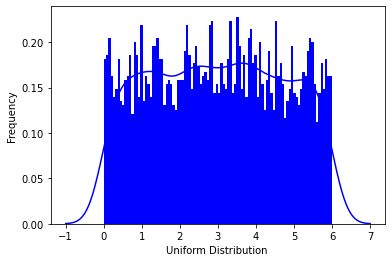

In [184]:
# Uniform  distribution

from scipy.stats import uniform
import seaborn as sns

data_uniform = uniform.rvs(size=len(df["RadiusJpt"]), loc = 0 , scale=6)

ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution '), Text(0, 0.5, 'Frequency')]

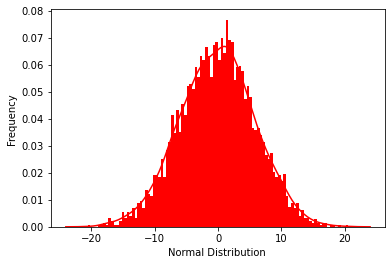

In [185]:
# Normal  distribution

from scipy.stats import norm


data_norm = norm.rvs(size=len(df["RadiusJpt"]), loc = 0 , scale=6)

ax = sns.distplot(data_norm,
                  bins=100,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution ', ylabel='Frequency')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Gamma Distribution '), Text(0, 0.5, 'Frequency')]

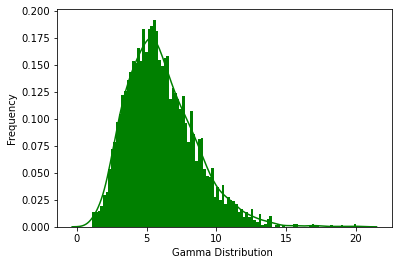

In [186]:
# Gamma  distribution

from scipy.stats import gamma


data_gamma = gamma.rvs(size=len(df["RadiusJpt"]), a=6)

ax = sns.distplot(data_gamma,
                  bins=100,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution ', ylabel='Frequency')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Exponential Distribution '), Text(0, 0.5, 'Frequency')]

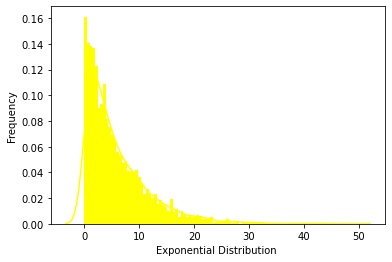

In [187]:
# Exponential  distribution

from scipy.stats import expon


data_exp = expon.rvs(size=len(df["RadiusJpt"]), scale=6, loc=0)

ax = sns.distplot(data_exp,
                  bins=100,
                  kde=True,
                  color='yellow',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution ', ylabel='Frequency')

### VISUALIZATIONS

6. Visualise key data series within the dataset by using the appropriate graphs. This can be done by using Python libraries, such as Matplotlib. Accompany any diagram with explanations. Draw conclusions based on the diagrams, which otherwise, without visualisation, would be difficult or impossible.

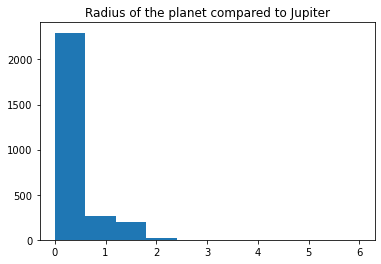

In [188]:
#let us start with a simple plot with Matplotlib library
import matplotlib.pyplot as plt

plt.hist(df["RadiusJpt"])
plt.title('Radius of the planet compared to Jupiter')

plt.show()

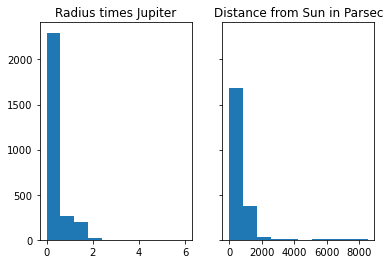

In [189]:
#let's add other columns to our plot and tweak the histogram to better show the values
fig, axes = plt.subplots(1,2,sharey=True)
axes[0].hist(df["RadiusJpt"])
axes[1].hist(df['DistFromSunParsec'])
#plt.hist(df["RadiusJpt"])
axes[0].set_title('Radius times Jupiter')


#plt.hist(df['DistFromSunParsec'])
axes[1].set_title('Distance from Sun in Parsec')

plt.show()

We can see in a much clearer way than compared to raw data how the values are distributed.

<AxesSubplot:xlabel='PlanetIdentifier', ylabel='PlanetaryMassJpt'>

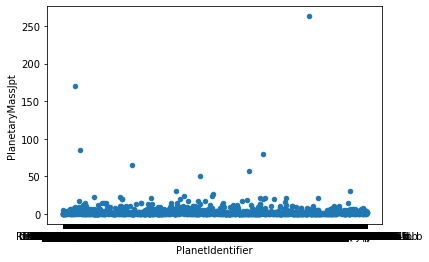

In [190]:
# we can use a Scatter plot to see the distribution between two columns or attributes
# In the example below we want to see how the Planetary mass is distributed in the dataset
# we can see that there is an outlier planet with a mass of over 250 (263 as per max value in the describe table above)
# the majority though are under 10 as per scatter plot below
df.plot.scatter('PlanetIdentifier','PlanetaryMassJpt')



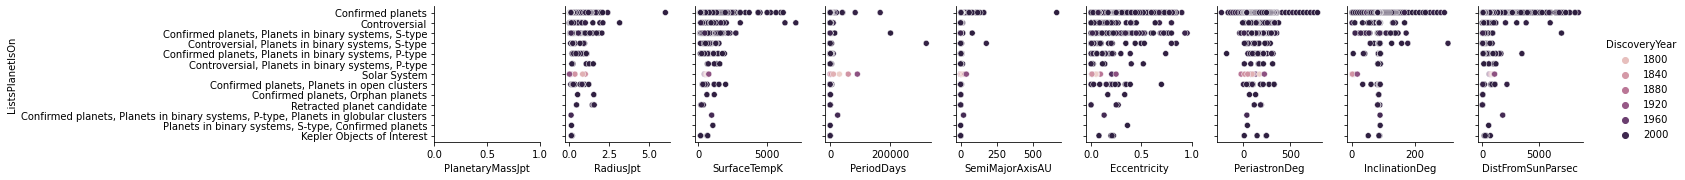

In [191]:
#if we want to compare multiple variables though we can use a tool such as pairplot below.

#pairplot will need a tidy data with no empty values in this case we use a linear interpolation to fill the missing values.
dfclean = df.interpolate(method='linear')


import seaborn as sns
sns.pairplot(dfclean, 
             y_vars=["ListsPlanetIsOn"],
             x_vars=['PlanetaryMassJpt', "RadiusJpt", "SurfaceTempK","PeriodDays","SemiMajorAxisAU","Eccentricity","PeriastronDeg","InclinationDeg","DistFromSunParsec"],
             hue= "DiscoveryYear",
             height=2.5
            );



### DATA REGRESSION MODEL

7. Identify the features and the labels, which will be used in the data regression model and justify why they were selected. Explain their importance for the process of building the ML model. Build a regression model by using appropriate Python library, such as Weka or Scikit-learns. Describe the employed ML algorithm and the reasons for choosing it. Run and test the machine learning model.

#### SCIKIT-LEARNS REGRESSION MODELS

As in the pairplot above we will select a predictor variable and a dependent variable.
I want to analyze the relationship between the distance from the sun and the period which by Kepler third law shoud be linear.
The choice of the features can be complicated.
In general we want to use our expertise of the subject our experience in dealing with similar datasets and of course we want to experiment many possibilities to find insights.




Coefficient of correlation:
[[-0.2225497]]
Intercept:
[650.6001912]
RMSE:
11154.530251142676


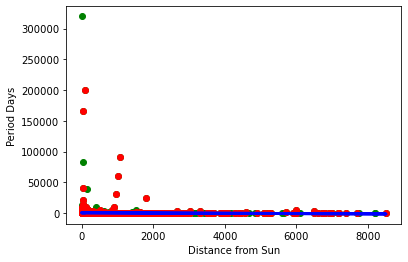

In [233]:
import numpy as np
from sklearn.linear_model import LinearRegression

#select features

X = dfclean[["DistFromSunParsec"]]
y = dfclean[["PeriodDays"]]



#let us try and find a straight line between the data points to predict future values

model = LinearRegression().fit(X,y)

yfit = model.predict(X)


plt.scatter(X,y,c='green')
plt.plot(X,yfit,linewidth=3,c="blue")
plt.xlabel('Distance from Sun')
plt.ylabel('Period Days')
print("Coefficient of correlation:")
print(model.coef_)
print("Intercept:")
print(model.intercept_)

#train the model

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=1/4,random_state=0)

model = LinearRegression().fit(Xtrain,ytrain)

ypred = model.predict(Xtest)
plt.scatter(Xtrain,ytrain,c='red')

plt.xlabel('Distance from Sun')
plt.ylabel('Period Days')
#evaluate the model
from sklearn.metrics import mean_squared_error
import math

#calculate RMSE (Root Mean Squared Error) to evaluate the accuracy of the model
MSE = mean_squared_error(ytest, ypred)
print ("RMSE:")
RMSE = math.sqrt(MSE)
print(RMSE)




## CONCLUSIONS

The result provided corroborate Kepler third law although the model given the high RMSE is certainly not a good one.
Such an high RMSE would warrant either changing the selected features or modify our parameters. 
The issue here is that we have imputed many values since we were facing an high amount of NaN, and this has added to noise and outliers which are tweaking the model. 
Although not very accurate though support my first hipotesis and we can repeat the same with different features.
It can certainly be used with similar datasets in other domain areas. I have also used R in the past and from a statistics and machine learning point of view is a valid programming language to consider as an alternative to Python for ML analysis. Just as Python has a strong ecosystem of libraries and markdown functionalites similar to Jupyter.